In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [414]:
idle = pd.read_excel("S:\\Production Call\\Service Level Forecast\\Service Level Forecast.xlsm",sheetname='idle revised')
idle = idle[['dow','date','required hours','actual hours','idle %']]

In [415]:
ex_abdn = pd.read_excel("S:\\Production Call\\Service Level Forecast\\Service Level Forecast.xlsm",sheetname='abdns over norm')
ex_abdn = ex_abdn[['dow','date','abd over norm']]

In [416]:
inf_aht = pd.read_excel("S:\\Production Call\\Service Level Forecast\\Service Level Forecast.xlsm",sheetname='workload aht effect')
inf_aht = inf_aht[['dow','date','diff']]

In [417]:
asa = pd.read_excel("S:\\Production Call\\Service Level Forecast\\Service Level Forecast.xlsm",sheetname='asa revisited')
asa = asa[['dow','date','asa']]

In [418]:
mltest = pd.merge(idle,ex_abdn,how='inner',on=['dow','date'])
mltest = pd.merge(mltest,inf_aht,how='inner',on=['dow','date'])
mltest = pd.merge(mltest,asa,how='inner',on=['dow','date'])

In [419]:
mltest['workload%'] = mltest['actual hours']/mltest['required hours']
mltest = mltest[['dow', 'date', 'workload%', 'idle %', 'abd over norm','diff','asa']]

In [420]:
mltest = mltest.rename(index=str, columns={"diff": "aht_inf"})

In [421]:
lastdayfrom = pd.to_datetime('9/30/2018')
mltest = mltest.set_index('date')
mltest = mltest.loc[lastdayfrom - pd.Timedelta(days=700):lastdayfrom].reset_index()
mltest.tail()

,date,dow,workload%,idle %,abd over norm,aht_inf,asa
633,2018-09-26,Wed,0.965145,0.038,2901.96,-6.349920,134.23
634,2018-09-27,Thu,1.140931,0.123,-406.24,-29.142519,24.82
635,2018-09-28,Fri,1.064746,0.080,476.80,-13.696975,56.47
636,2018-09-29,Sat,1.242976,0.193,-231.56,-17.368213,32.81
637,2018-09-30,Sun,1.264467,0.222,136.20,-27.803152,43.10


In [422]:
mltest = mltest.set_index('dow')

In [423]:
mltestmon = mltest.loc[['Mon']]
mltesttue = mltest.loc[['Tue']]
mltestwed = mltest.loc[['Wed']]
mltestthu = mltest.loc[['Thu']]
mltestfri = mltest.loc[['Fri']]
mltestsat = mltest.loc[['Sat']]
mltestsun = mltest.loc[['Sun']]

In [424]:
mltestmon.reset_index()
mltesttue.reset_index()
mltestwed.reset_index()
mltestthu.reset_index()
mltestfri.reset_index()
mltestsat.reset_index()
mltestsun.reset_index().head()

,dow,date,workload%,idle %,abd over norm,aht_inf,asa
0,Sun,2017-01-01,1.062194,0.123,763.12,37.932031,53.73
1,Sun,2017-01-08,0.891016,0.094,3571.80,11.021122,171.89
2,Sun,2017-01-15,1.100931,0.160,950.24,2.859395,64.38
3,Sun,2017-01-22,1.310270,0.243,-225.04,-17.489548,19.94
4,Sun,2017-01-29,1.300544,0.249,-37.68,-16.476123,23.61


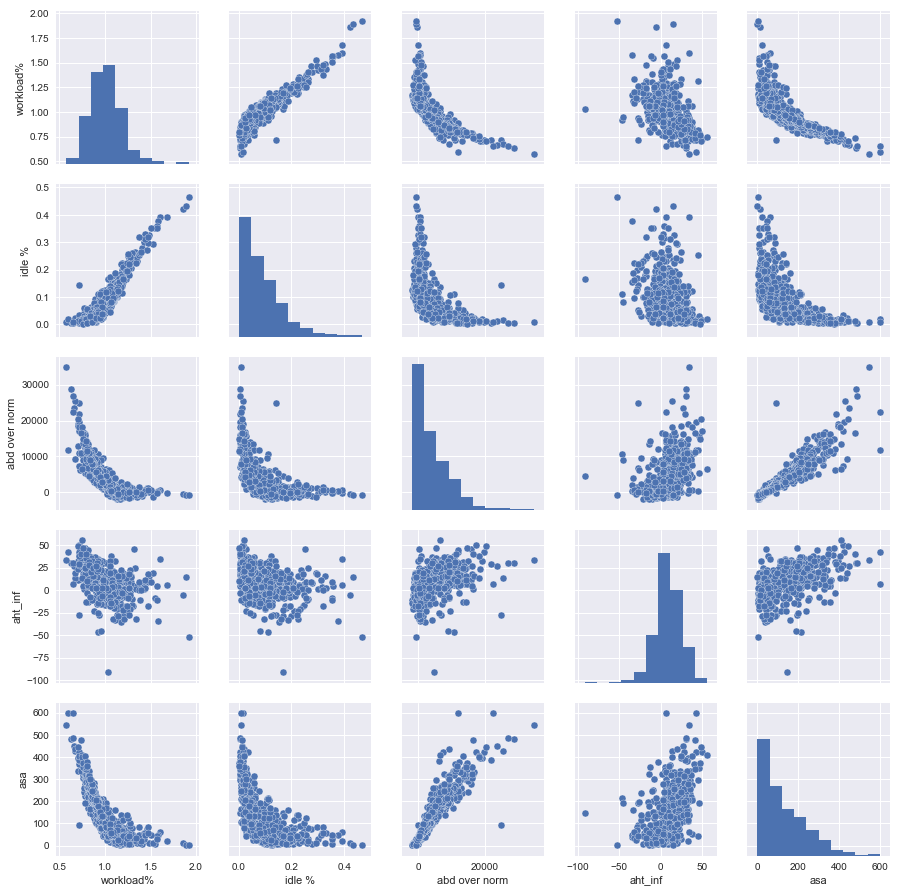

In [425]:
sns.pairplot(mltest)

In [426]:
y = mltestmon['idle %']
X = mltestmon[['workload%']]

In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)
#test_size is how much of the dataset will be predicted upon, the copliment is the train size

In [428]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [429]:
predictions = lm.predict(X_test)
lm.score(X,y)
#this is the r^2

0.9310298176312598

In [430]:
df = pd.DataFrame(predictions)
df.head()

,0
0,0.083102
1,0.084293
2,0.275730
3,0.245433
4,0.069211


In [431]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0213495295864
MSE: 0.000694760798736
RMSE: 0.0263583155519


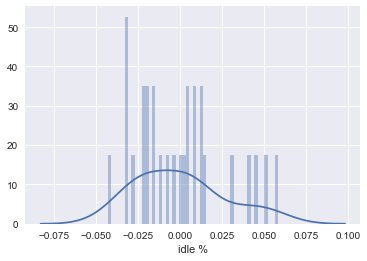

In [432]:
sns.distplot((y_test-predictions),bins=50)
#normal distribution indicates that the model is strong

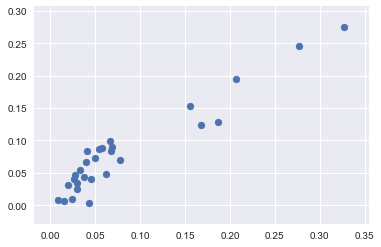

In [433]:
plt.scatter(y_test,predictions)
#a diagnol line is another indicator of a strong model

In [434]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
workload%,0.400332


In [435]:
lm.intercept_

-0.31792987943192536

In [436]:
y2 = mltesttue['idle %']
X2 = mltesttue[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=.3, random_state=101)
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
predictions2 = lm2.predict(X_test)
lm2.score(X2,y2)

0.80668972747998002

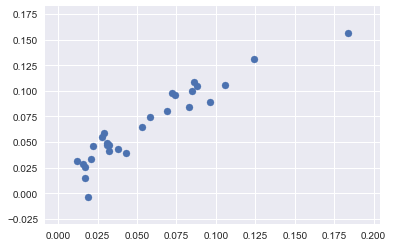

In [437]:
plt.scatter(y_test,predictions2)

In [438]:
y3 = mltestwed['idle %']
X3 = mltestwed[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=.3, random_state=101)
lm3 = LinearRegression()
lm3.fit(X_train,y_train)
predictions3 = lm3.predict(X_test)
lm3.score(X3,y3)

0.81922593372757158

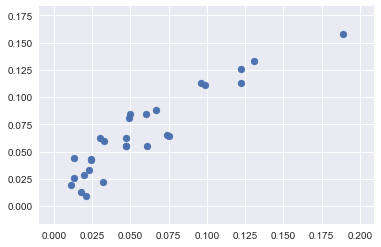

In [439]:
plt.scatter(y_test,predictions3)

In [440]:
y4 = mltestthu['idle %']
X4 = mltestthu[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=.3, random_state=101)
lm4 = LinearRegression()
lm4.fit(X_train,y_train)
predictions4 = lm4.predict(X_test)
lm4.score(X4,y4)

0.86880104863118679

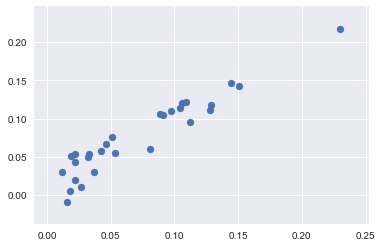

In [441]:
plt.scatter(y_test,predictions4)

In [442]:
y5 = mltestfri['idle %']
X5 = mltestfri[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=.3, random_state=101)
lm5 = LinearRegression()
lm5.fit(X_train,y_train)
predictions5 = lm5.predict(X_test)
lm5.score(X5,y5)

0.76112514635419115

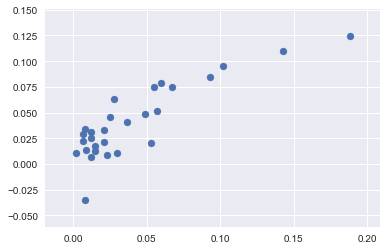

In [443]:
plt.scatter(y_test,predictions5)

In [444]:
y6 = mltestsat['idle %']
X6 = mltestsat[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=.3, random_state=101)
lm6 = LinearRegression()
lm6.fit(X_train,y_train)
predictions6 = lm6.predict(X_test)
lm6.score(X6,y6)

0.84976208268987574

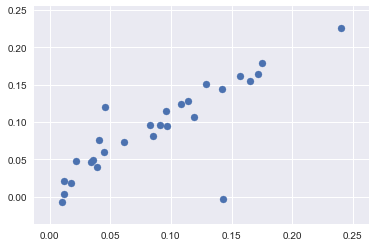

In [445]:
plt.scatter(y_test,predictions6)

In [446]:
y7 = mltestsun['idle %']
X7 = mltestsun[['workload%']]
X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=.3, random_state=101)
lm7 = LinearRegression()
lm7.fit(X_train,y_train)
predictions7 = lm7.predict(X_test)
lm7.score(X7,y7)

0.94293723279767161

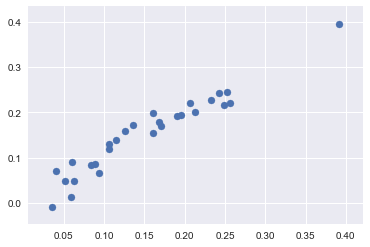

In [447]:
plt.scatter(y_test,predictions7)

In [448]:
forecast = pd.read_excel("C:\\Users\\scwhall\\Documents\\practice file.xlsx",sheetname='Sheet1')
forecast = forecast[['dow','diff']]
forecast = forecast.set_index('dow')
forecastmon = forecast.loc[['Mon']]
forecasttue = forecast.loc[['Tue']]
forecastwed = forecast.loc[['Wed']]
forecastthu = forecast.loc[['Thu']]
forecastfri = forecast.loc[['Fri']]
forecastsat = forecast.loc[['Sat']]
forecastsun = forecast.loc[['Sun']]
forecastmon.reset_index()
forecasttue.reset_index()
forecastwed.reset_index()
forecastthu.reset_index()
forecastfri.reset_index()
forecastsat.reset_index()
forecastsun.reset_index().head()

,dow,diff
0,Sun,1.412259
1,Sun,1.413949
2,Sun,1.273448
3,Sun,1.315876


In [449]:
predictions2 = lm.predict(forecastmon)
df = pd.DataFrame(predictions2)
predictions3 = lm2.predict(forecasttue)
df2 = pd.DataFrame(predictions3)
predictions4 = lm3.predict(forecastwed)
df3 = pd.DataFrame(predictions4)
predictions5 = lm4.predict(forecastthu)
df4 = pd.DataFrame(predictions5)
predictions6 = lm5.predict(forecastfri)
df5 = pd.DataFrame(predictions6)
predictions7 = lm6.predict(forecastsat)
df6 = pd.DataFrame(predictions7)
predictions8 = lm7.predict(forecastsun)
df7 = pd.DataFrame(predictions8)

In [450]:
df2

,0
0,0.107045
1,0.116684
2,0.108520
3,0.105601


In [451]:
#this probably does not need to be split up into seperate days of week and then reassembled since it was found out that the required hours could not be used directly due to the formula

In [452]:
df = df.rename(index=str, columns={0: "idle forecast"})
df2 = df2.rename(index=str, columns={0: "idle forecast"})
df3 = df3.rename(index=str, columns={0: "idle forecast"})
df4 = df4.rename(index=str, columns={0: "idle forecast"})
df5 = df5.rename(index=str, columns={0: "idle forecast"})
df6 = df6.rename(index=str, columns={0: "idle forecast"})
df7 = df7.rename(index=str, columns={0: "idle forecast"})

In [453]:
dates = [pd.Timestamp('2018-11-5'), pd.Timestamp('2018-11-12'), pd.Timestamp('2018-11-19'),pd.Timestamp('2018-11-26'),pd.Timestamp('2018-11-6'),pd.Timestamp('2018-11-13'),pd.Timestamp('2018-11-20'),
         pd.Timestamp('2018-11-27'),pd.Timestamp('2018-11-7'),pd.Timestamp('2018-11-14'),pd.Timestamp('2018-11-21'),
         pd.Timestamp('2018-11-28'),pd.Timestamp('2018-11-1'),pd.Timestamp('2018-11-8'),pd.Timestamp('2018-11-15'),
         pd.Timestamp('2018-11-22'),pd.Timestamp('2018-11-29'),pd.Timestamp('2018-11-2'),pd.Timestamp('2018-11-9'),
         pd.Timestamp('2018-11-16'),pd.Timestamp('2018-11-23'),pd.Timestamp('2018-11-30'),pd.Timestamp('2018-11-3'),
        pd.Timestamp('2018-11-10'),pd.Timestamp('2018-11-17'),pd.Timestamp('2018-11-24'),pd.Timestamp('2018-11-4'),
         pd.Timestamp('2018-11-11'),pd.Timestamp('2018-11-18'),pd.Timestamp('2018-11-25')]

In [454]:
dates = pd.DataFrame(dates)

In [455]:
df = df.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)

In [456]:
df = df.reset_index(drop=True)

In [458]:
df = pd.concat([df,dates],axis=1)

In [460]:
df = df.rename(index=str, columns={0: "date"})

In [463]:
df = df.sort_values(by=['date'])

In [464]:
df

,idle forecast,date
12,0.082007,2018-11-01
17,0.079722,2018-11-02
22,0.147740,2018-11-03
26,0.284735,2018-11-04
0,0.127731,2018-11-05
4,0.107045,2018-11-06
8,0.101329,2018-11-07
13,0.098304,2018-11-08
18,0.086137,2018-11-09
23,0.191899,2018-11-10
